# Neural Networks

Neural networks are the extension of the __Single Neuron__ model, but using many neurond in parallel across multiple layers: an input layer, 
one or more hidden layers, and an output layer. While an individual neuron can only create linear spearations, these networks can be trained to recognize complex, non-linear patterns. 

## Overview 

__Weights:__
Just like with individual neurons, each of the neurons in a neural network has weights attached to every input, but all other layers expect the first one take the outputs of the previous layer as input instead of a state vector. This network of  


__Non-Linearity:__

The non-linear aspect of the model is due to a non-linear **Activation Function** which modifies the outputs of each neuron before passing it on to the next layer. This breaks the linearity of the system and allows the network to model much more complicated datasets.

__Forward propagation:__ 

Foward propogation is how the model comes to a decision based on some input vector. The process follows these steps:
1. The first layer of neurons give a result based on the input vector, their weights, and their biases. 
2. The non-linear activation function is applied to the results of the neurons.
3. The modified results are supplied to the next layer as input.
4. Repeat until the output results have been computed.
5. Take the output with the highest value as the classification, a higher value means higher confidence.
Which is represented by the formula:

   $$z = \sum_{i=1}^n w_i x_i + b$$
   $$\hat{y} = \sigma(z) $$

   Where $w_i$ are weights, $x_i$ are inputs, $b$ is bias, and $\sigma$ is the activation function.


__Backpropagation:__

Just like in a single neuron, the model learns by adjusting its weights to maximize the likelyhood of correct classifications.

In a neural network, this is achieved thorugh backpropagation, a key algorithm that adjusts weights and biases to minimize the error between predicted and actual outputs. It uses the chain rule to compute gradients layer by layer:

$$\delta^l = (\nabla_a C) \odot \sigma'(z^l)$$  
$$\delta^l = ((W^{l+1})^T \delta^{l+1}) \odot \sigma'(z^l)$$  

Where:  
- $\delta^l$ is the error at layer $l$  
- $\nabla_a C$ is the gradient of the cost function  
- $\sigma'(z^l)$ is the derivative of the activation function  
- $W^{l+1}$ are the weights of the next layer


## Operation

To train a neural network, the following steps are performed:
1. **Initialization**: The weights (`W`) and biases (`B`) are initialized randomly.
2. **Forward Propagation**: The input data (`train_X`) is passed through the network to compute predictions.
3. **Error Calculation**: The difference between the predicted output and the actual labels (`onehot_train_y`) is calculated using a cost function (e.g., Mean Squared Error).
4. **Backpropagation**: Gradients of the cost function with respect to weights and biases are computed and used to update them, minimizing the error.
5. **Iteration**: Steps 2-4 are repeated for multiple epochs to improve the network's performance.

Once trained, the network is tested with unused data (`test_X` and `onehot_test_y`) to evaluate its generalization ability. The key difference is:
- **Training Data**: Used to adjust weights and biases during training.
- **Test Data**: Used to assess the model's performance on new, unseen examples.

It is possible for the model to become overfitted, where it works specifically for training data instead of the general dataset, so test data is necesary to make sure this is not the case.

In [1]:
# this section adds the package path to the system path so it can be used here
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))


import mltoolbox as ml # my module


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from scipy.io import loadmat

data = loadmat('../../Datasets/emnist-letters.mat')
X = data['dataset']['train'][0][0]['images'][0][0]
y = data['dataset']['train'][0][0]['labels'][0][0]


Letter: u


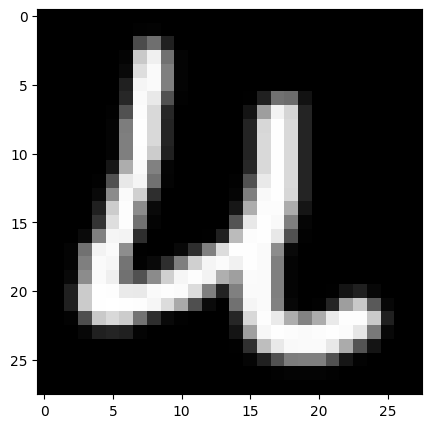

In [3]:
# Displaying a letter

num = 16

plt.figure(figsize=(6, 5))
plt.imshow(np.fliplr(np.rot90(X[num].reshape(28, 28), k=-1)), cmap="gray")

label = chr(y[num][0] + 96)  # Convert to letter (assuming labels are 1-indexed for 'a' to 'z')
print(f"Letter: {label}")
plt.show()

In [4]:
# Reduce the number of images to 60,000
X = X[0:60000]


# Scale the data
X = X/255

# divide data into training and testing, first 50000 is training, last 10000 are testing
train_X = X[0:50000]
test_X = X[50000:60000]

train_y = y[0:50000]
test_y = y[50000:60000]


# One hot encode the training labels
onehot_train_y = []

for y in train_y:
    temp_vec = np.zeros((26, 1))
    temp_vec[y-1] = 1.0
    onehot_train_y.append(temp_vec)
   

# Testing Data

onehot_test_y = []

for y in  test_y:
    temp_vec = np.zeros((26, 1))
    temp_vec[y-1] = 1.0
    onehot_test_y.append(temp_vec)


In [5]:
W, B = ml.initialize_weights()

MSE(net.W, net.B, flat_train_X, onehot_train_y) = [[1.1522207]] 

predicted digit is: z
actual digit is: e


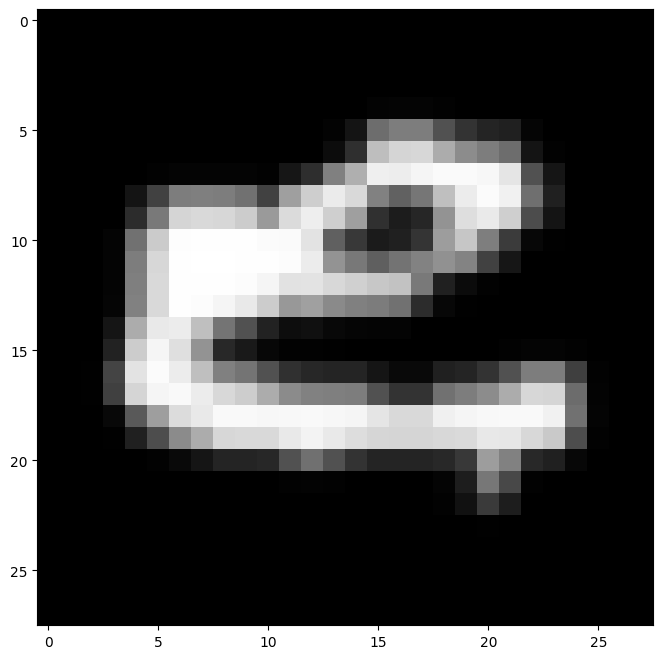

In [6]:
# Initialize a network with 784 input nodes, two hidden layers with 60 nodes each 
# and a output layer with 10 nodes. 
net = ml.DenseNetwork(layers = [784, 120, 145, 120, 26])

# Check the mean squared error before training 
print(f"MSE(net.W, net.B, flat_train_X, onehot_train_y) = {ml.MSE(net.W, net.B, train_X, onehot_train_y)} \n")

# Make a random prediction before training
i = np.random.randint(0, len(test_X))
prediction = net.predict(test_X[i])

print(f"predicted digit is: {chr(prediction + 97)}")
print(f"actual digit is: {chr(np.argmax(onehot_test_y[i]) + 97)}")
plt.figure(figsize=(8, 8))
np.fliplr(np.rot90(test_X[np.argmax(onehot_test_y[i])].reshape(28, 28), k=-1))
plt.imshow(np.fliplr(np.rot90(test_X[i].reshape(28, 28), k=-1)), cmap="gray")
plt.show()

In [7]:
# Train your network with stochastic gradient descent!
net.train(train_X, onehot_train_y)

Starting Cost = [[1.1522207]]
k:  0
1-Epoch Cost = [[0.17530413]]
k:  1
2-Epoch Cost = [[0.12211953]]
k:  2
3-Epoch Cost = [[0.09383663]]
k:  3
4-Epoch Cost = [[0.07569121]]


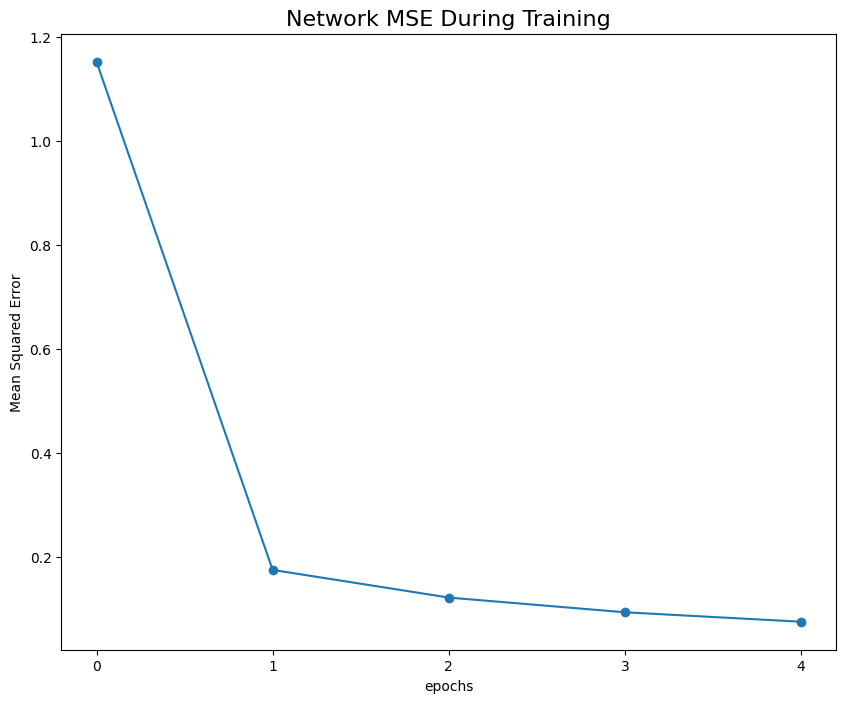

In [8]:
# Visualize the mean squared error over the training process 
plt.figure(figsize = (10, 8))
epochs = range(len(net.errors_))
err = [j.tolist()[0][0] for j in net.errors_]

plt.plot(epochs, err, marker = "o")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")
plt.title("Network MSE During Training", fontsize = 16)
plt.show()

predicted digit is: v
actual digit is: v


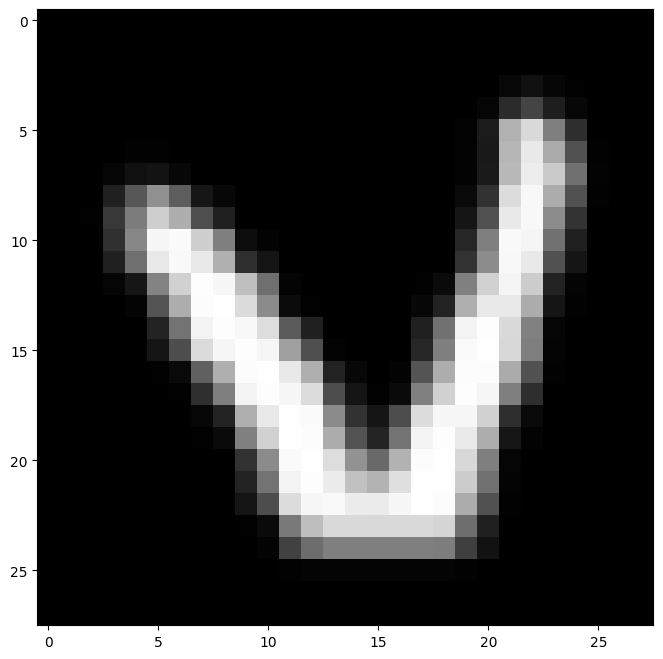

In [16]:
# Testing it
i = np.random.randint(0, len(test_X))
prediction = net.predict(test_X[i])

print(f"predicted digit is: {chr(prediction + 97)}")
print(f"actual digit is: {chr(np.argmax(onehot_test_y[i]) + 97)}")
plt.figure(figsize=(8, 8))
plt.imshow(np.fliplr(np.rot90(test_X[i].reshape(28, 28), k=-1)), cmap="gray")
plt.show()